In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import leastsq
import datetime
%matplotlib inline

In [25]:
#Pre-process file
#filename = 'ArgonValidation_nt_B4_g.csv'
#filename = '10cm_1e6_400GeV_RbAwake10minus7_cut1_5mm_nt_B4_g_processed.csv'
to=datetime.datetime.now()
filename = '/home/iwsatlas1/fior/10cm_1e6_400GeV_Ar_cut1_5mm_nt_B4_g_processed.csv'
filename = '/home/iwsatlas1/fior/10cm_1e6_400GeV_Rb10minus4_beam_cut1_5mm_nt_B4_g_processed.csv'
#filename = '/media/gabriel/UNTITLED/PAI_Geant4/10cm_1e6_400GeV_RbAwake10minus4_cut1_5mm_nt_B4_g_processed.csv'
#filename = '/home/gabriel/Dropbox/Test82-build/10cm_1e6_400GeV_Rb10minus7_beam_cut1_5mm_nt_B4_g.csv'
columns_new2 =['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName',
                                'mompreX','mompreY','mompreZ','momposX','momposY','momposZ',
              'stepLength'] 
columns_new=['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName',
                                'mompreX','mompreY','mompreZ','momposX','momposY','momposZ','ParticleId']
columns_old = ['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName',
                                'ParticleId']
columns_new3 = ['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName',
                                'mompreX','mompreY','mompreZ','momposX','momposY','momposZ','stepLength','ParticleId']

t0 = datetime.datetime.now()
df = pd.read_csv(filename,
                 skiprows=0,header=None,#nrows=1e7,#17*1e6
                 names=columns_new3,
                 index_col=None
                )

print 'elapsed: '+str(datetime.datetime.now()-t0)
"""
count1=0
list1=[]
print 'reading: elapsed '+str(datetime.datetime.now()-t0)
t0 = datetime.datetime.now()
for i in range(df.shape[0]):
    
    #if i%1000==0:
    #    print 'i= ' + str(i)
    if df.iloc[i]['processName']=='event':
        count1 +=1
    else:
        list1.append(count1)    

print 'processing: elapsed '+str(datetime.datetime.now()-t0)
"""

elapsed: 0:00:35.515224


"\ncount1=0\nlist1=[]\nprint 'reading: elapsed '+str(datetime.datetime.now()-t0)\nt0 = datetime.datetime.now()\nfor i in range(df.shape[0]):\n    \n    #if i%1000==0:\n    #    print 'i= ' + str(i)\n    if df.iloc[i]['processName']=='event':\n        count1 +=1\n    else:\n        list1.append(count1)    \n\nprint 'processing: elapsed '+str(datetime.datetime.now()-t0)\n"

In [26]:
print filename
print df.shape#, len(df.ParticleId.unique())
print df.head()

/home/iwsatlas1/fior/10cm_1e6_400GeV_Rb10minus4_beam_cut1_5mm_nt_B4_g_processed.csv
(17181664, 21)
   trackId  parentId volumeName particleName  stepNumber      posX     posY  \
0        1         0      Layer       proton           2  0.106066  0.03324   
1        1         0      Layer       proton           3  0.106066  0.03324   
2        1         0      Layer       proton           4  0.106066  0.03324   
3        1         0      Layer       proton           5  0.106066  0.03324   
4        1         0      Layer       proton           6  0.106066  0.03324   

      posZ      perp  kineeticEnergyDiff     ...      kineticEnergyPostStep  \
0 -48.4818  0.111153              0.0000     ...               4.000000e+11   
1 -42.1998  0.111153              0.0000     ...               4.000000e+11   
2 -34.7235  0.111153           -303.7260     ...               4.000000e+11   
3 -28.2130  0.111153            -27.3064     ...               4.000000e+11   
4 -22.2753  0.111153           

In [14]:

#NOT NECESSARY BECAUSE OF PRE-PROCESSING BEFORE
#reading data frame
#filename = 'testem8_nt_B4_g.csv'
#filename = 'B4_nt_B4_g_origin_processed.csv'
#filename = 'ArgonValidation_nt_B4_g.csv'
#filename = 'argon_400geV_ntp.csv'
#df = pd.read_csv('/Users/gabrielfior/OneDrive/Master Thesis/Share_Ubuntu/'+filename,
#                 skiprows=7,header=None,names=['energyDeposited_ev','fClusters','whatever'])
#df = pd.read_csv('/Volumes/UNTITLED/'+filename,
#                 skiprows=19,header=None,names=['trackId','parentId','volumeName','particleName','stepNumber',
#                                               'posX','posY','posZ','perp','stepLength','kineeticEnergyDiff',
#                                               'edepStep','kineticEnergyPostStep','processName','fCluster',
#                                                'particleId'])

df_new = pd.DataFrame()
countId=0
for i in range(100):
    x = df.iloc[i]
    if 'event' in df.volumeName:
        countId+=1
        
    else:
        #x['particleId'] = countId
        df.iloc[i]['particleId'] = countId
    
print 'done'
    

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done


In [20]:
df.head()

,trackId,parentId,volumeName,particleName,stepNumber,posX,posY,posZ,perp,kineeticEnergyDiff,...,kineticEnergyPostStep,processName,mompreX,mompreY,mompreZ,momposX,momposY,momposZ,stepLength,ParticleId
0,1,0,Layer,proton,2,0.106066,0.03324,-48.4818,0.111153,0.0000,...,4.000000e+11,Transportation,0.0,0.0,4.009370e+11,0.0,0.0,4.009370e+11,6.66667,0.0
1,1,0,Layer,proton,3,0.106066,0.03324,-42.1998,0.111153,0.0000,...,4.000000e+11,Transportation,0.0,0.0,4.009370e+11,0.0,0.0,4.009370e+11,6.66667,0.0
2,1,0,Layer,proton,4,0.106066,0.03324,-34.7235,0.111153,-303.7260,...,4.000000e+11,Transportation,0.0,0.0,4.009370e+11,0.0,0.0,4.009370e+11,6.66667,0.0
3,1,0,Layer,proton,5,0.106066,0.03324,-28.2130,0.111153,-27.3064,...,4.000000e+11,Transportation,0.0,0.0,4.009370e+11,0.0,0.0,4.009370e+11,6.66667,0.0
4,1,0,Layer,proton,6,0.106066,0.03324,-22.2753,0.111153,-31.4558,...,4.000000e+11,Transportation,0.0,0.0,4.009370e+11,0.0,0.0,4.009370e+11,6.66667,0.0


In [27]:
#df.head(40)

#df_events=df[df.processName=='event']
df_steps_p = df[(df.particleName=='proton')]
df_steps_e = df[(df.particleName=='e-')]

#df_steps_p = df[(df.particleName=='proton')]
#df_steps_e = df[(df.particleName=='e-')]


#del (df)
#print df.shape
print np.mean(df_steps_p.edepStep)
print df_steps_p.columns
#df.energyDeposited_ev.unique()

82.8616001472
Index([u'trackId', u'parentId', u'volumeName', u'particleName', u'stepNumber',
       u'posX', u'posY', u'posZ', u'perp', u'kineeticEnergyDiff', u'edepStep',
       u'kineticEnergyPostStep', u'processName', u'mompreX', u'mompreY',
       u'mompreZ', u'momposX', u'momposY', u'momposZ', u'stepLength',
       u'ParticleId'],
      dtype='object')


/home/iwsatlas1/fior/10cm_1e6_400GeV_Rb10minus4_beam_cut1_5mm_nt_B4_g_processed.csv


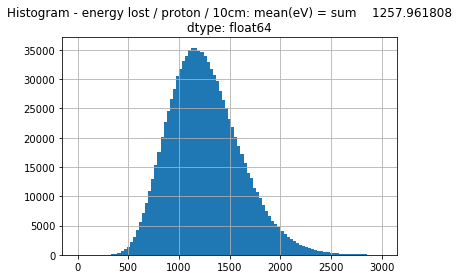

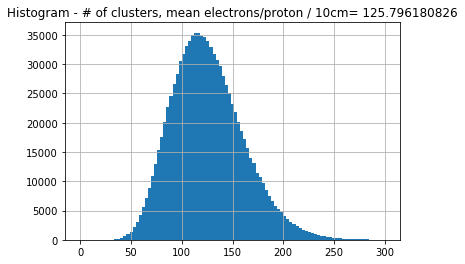

In [28]:
#Group by stepNumber
agg1 = {'edepStep':['sum'], 'stepNumber': ['max'], 'kineticEnergyPostStep':['min','max']}
df_grouped_p = df_steps_p.groupby('ParticleId',as_index=False,group_keys=False).agg(agg1)

electronIonPairConv = 10.0 #eV for Rb
df_grouped_p['primClusters'] = df_grouped_p.edepStep.apply(lambda x: x/electronIonPairConv)

print filename
df_grouped_p.edepStep.hist(bins=np.linspace(0,3000,100))
plt.title('Histogram - energy lost / proton / 10cm: mean(eV) = '+str(df_grouped_p.edepStep.mean()))
plt.show()
df_grouped_p.primClusters.hist(bins=np.linspace(0,300,100))
plt.title('Histogram - # of clusters, mean electrons/proton / 10cm= '+str(df_grouped_p.primClusters.mean()))
plt.show()

# Investigate radial distribution of energy deposit

In [29]:
fundouble = lambda x: np.double("%.2f" % round(x*1e6,2))

In [30]:
df_steps_p['posRtoGroup'] = df_steps_p.perp.apply(fundouble)

/home/iwsatlas1/fior/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/home/iwsatlas1/fior/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


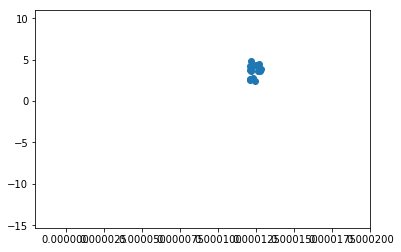

In [31]:
plt.scatter((df.perp),np.log(df.edepStep))
plt.xlim([-.00002,0.0002])
plt.show()

1040290.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8874bce10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe7cdb0c2d0>]], dtype=object)

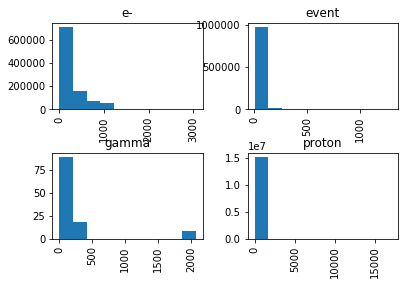

In [32]:
#data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)
print df_steps_p.posRtoGroup.max()
df.hist(column='edepStep',by='particleName',bins=10)